In [ ]:
#EDA_IRIS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

%matplotlib inline

In [10]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range


In [11]:
# To read dataset
df = pd.read_csv(r"C:\Users\nehup\Downloads\IRIS.csv")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
print(df.shape)

(150, 5)


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [14]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [15]:
# To check for duplicates
dups = df.duplicated()
print("Number of duplicate rows = %d " %(dups.sum()))
df[dups]

Number of duplicate rows = 3 


,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [16]:
# To remove duplicates
df.drop_duplicates(inplace=True)
print("\nAfter removing duplicates rows = %d " %(df.duplicated().sum()))
print(df.shape)



After removing duplicates rows = 0 
(147, 5)


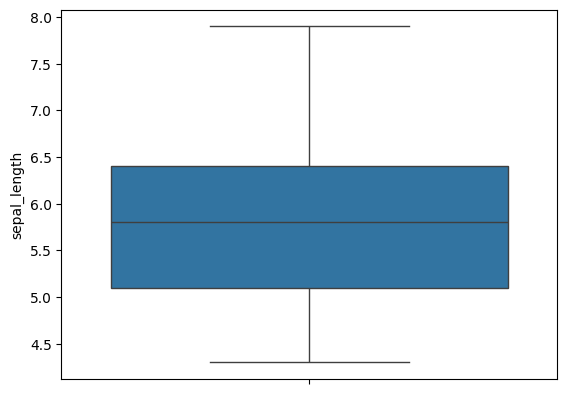

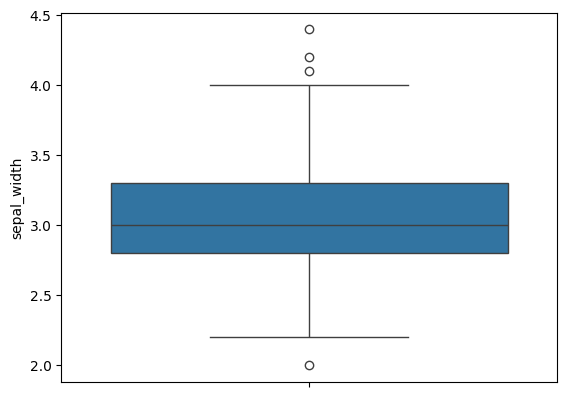

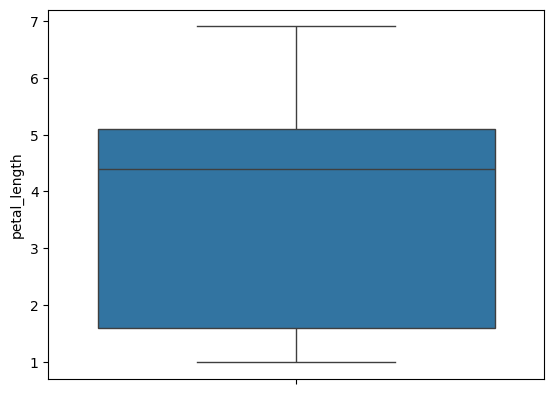

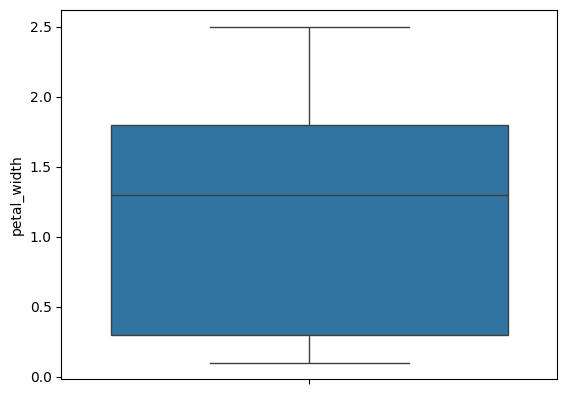

In [17]:
# To check outliers as boxplot using for loop
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        sns.boxplot(df[col])
        plt.show()

In [18]:
# To remove outliers by calling remove_outliers function
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        lower_range, upper_range = remove_outliers(df[col])
        df = df[(df[col] > lower_range) & (df[col] < upper_range)]
        
print(df.shape)


(143, 5)


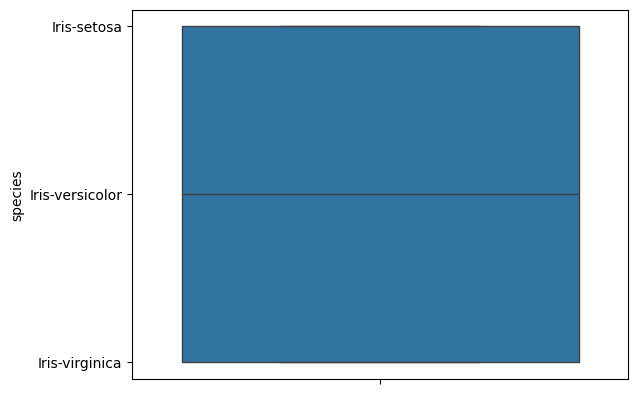

In [19]:
# To check for outliers in categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        sns.boxplot(df[col])
        plt.show()
# No outliers in categorical columns

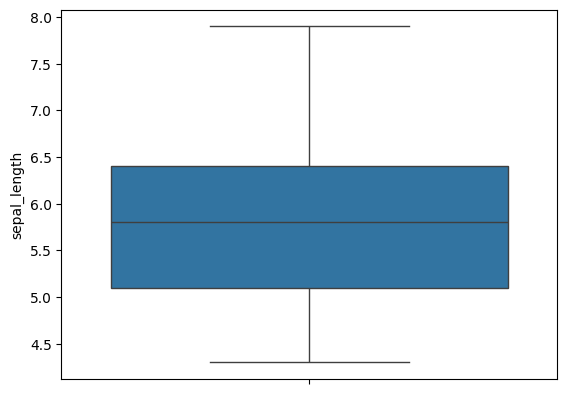

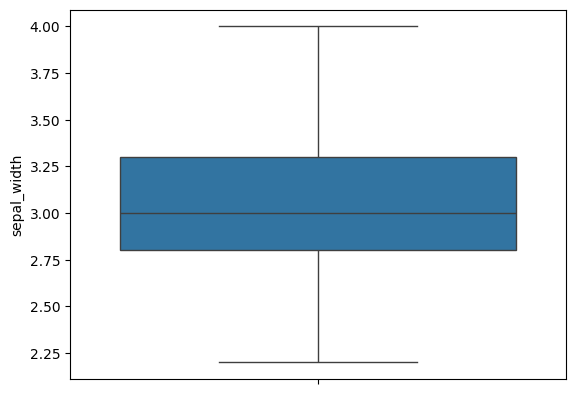

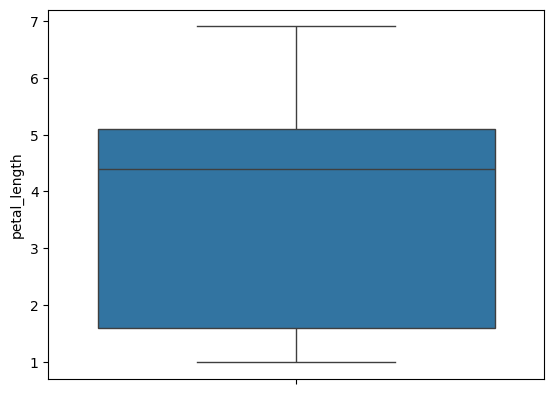

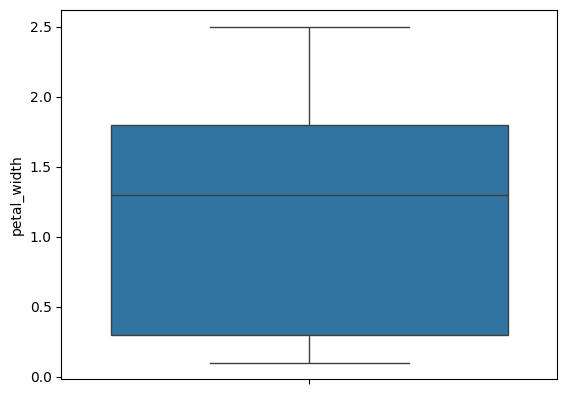

In [20]:
# To chech whether outliers are treated or not
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        sns.boxplot(df[col])
        plt.show()

In [21]:
# To chek for missing values in all columns
print(df.isnull().sum())

# No missing values in dataset so no use of imputation(Mean, median, mode)

print(df.dtypes)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


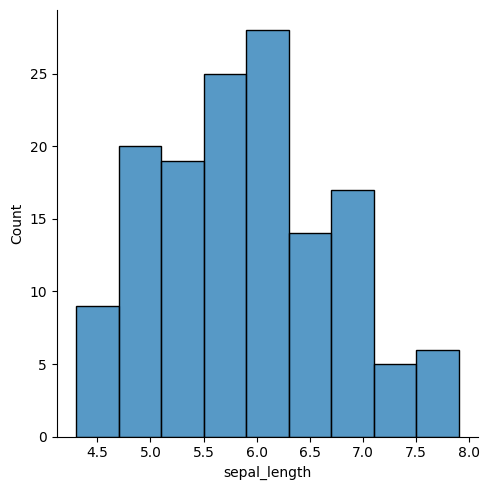

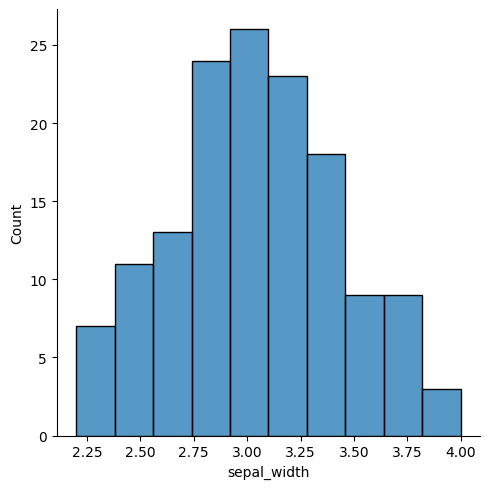

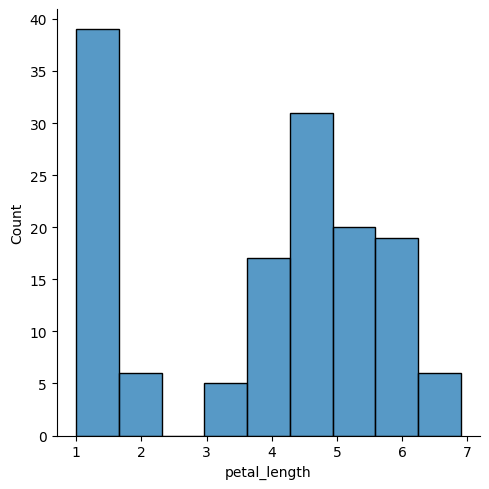

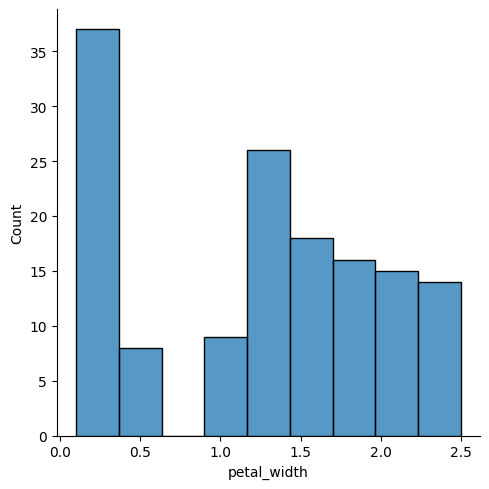

In [22]:
# Univariate analysis
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        sns.displot(df[col])
        plt.show()

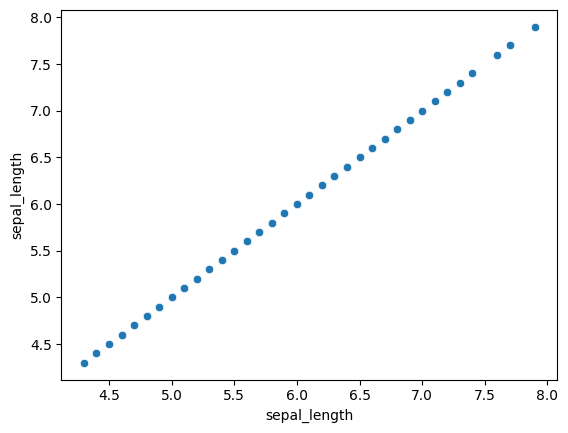

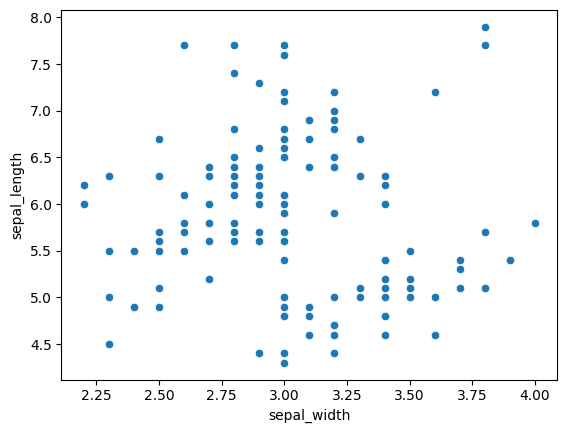

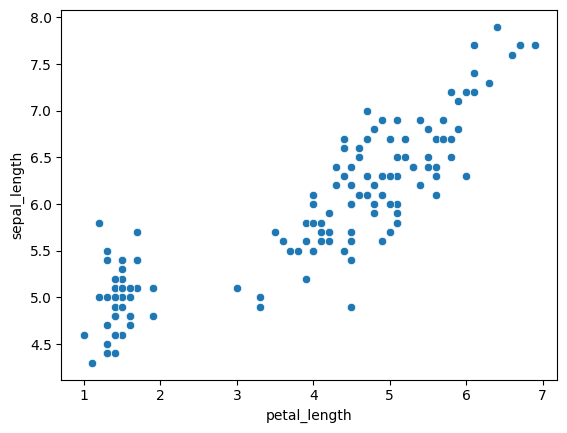

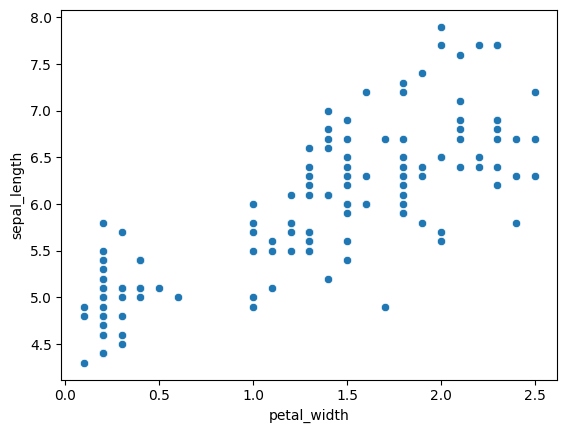

In [23]:
# Bivariate analysis
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        sns.scatterplot(x=df[col],y=df['sepal_length'])
        plt.show()

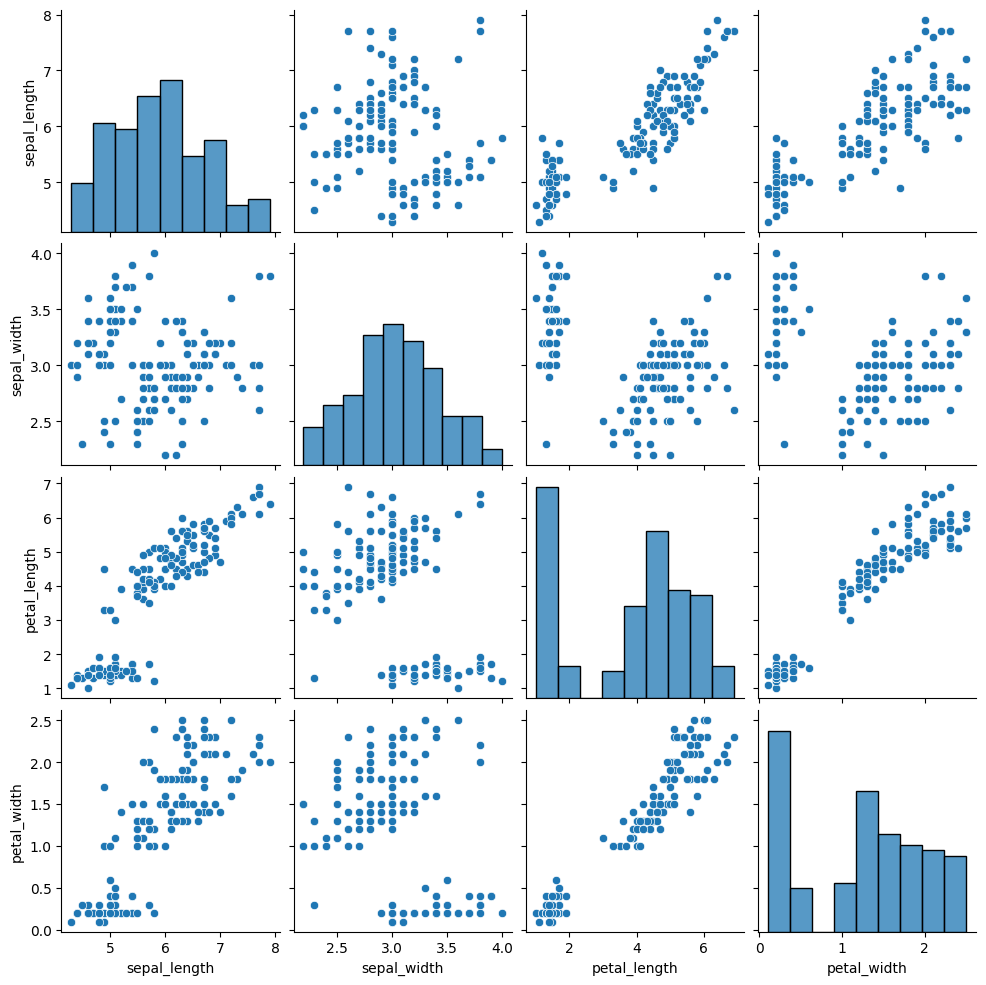

In [24]:
# Multivariate analysis
sns.pairplot(df)
plt.show()


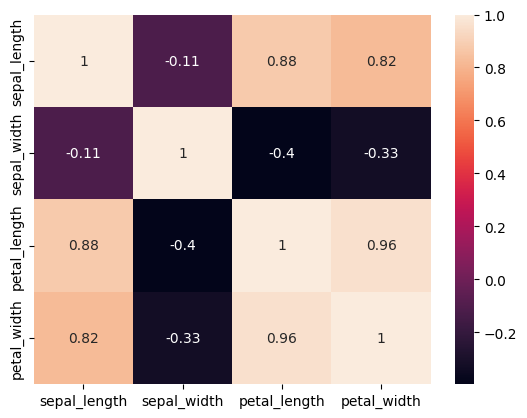

In [26]:
# Correlation

sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(),annot=True)
plt.show()

In [ ]:
# Scales the data. Essentially returns the z-scores of every attribute

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale
StandardScaler(copy=True, with_mean=True, with_std=True)    


,copy,True
,with_mean,True
,with_std,True


In [ ]:
#standardization or scaling or normalization

df['sepal_length'] = std_scale.fit_transform(df[['sepal_length']])  
df['sepal_width'] = std_scale.fit_transform(df[['sepal_width']])
df['peta_length'] = std_scale.fit_transform(df[['petal_length']])
df['petal_width'] = std_scale.fit_transform(df[['petal_width']])

df.head()   

,sepal_length,sepal_width,petal_length,petal_width,species,peta_length
0,-0.926103,1.163072,1.4,-1.370894,Iris-setosa,-1.393237
1,-1.166453,-0.096923,1.4,-1.370894,Iris-setosa,-1.393237
2,-1.406803,0.407075,1.3,-1.370894,Iris-setosa,-1.450554
3,-1.526978,0.155076,1.5,-1.370894,Iris-setosa,-1.335921
4,-1.046278,1.415071,1.4,-1.370894,Iris-setosa,-1.393237


In [ ]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['species'] = LE.fit_transform(df['species'])


df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,peta_length,['Species']_Iris-setosa,['Species']_Iris-versicolor,['Species']_Iris-virginica
0,-0.926103,1.163072,1.4,-1.370894,0,-1.393237,True,False,False
1,-1.166453,-0.096923,1.4,-1.370894,0,-1.393237,True,False,False
2,-1.406803,0.407075,1.3,-1.370894,0,-1.450554,True,False,False
3,-1.526978,0.155076,1.5,-1.370894,0,-1.335921,True,False,False
4,-1.046278,1.415071,1.4,-1.370894,0,-1.393237,True,False,False
